In [77]:
import numpy as np # only need this once per program

file_name = 'amplitudes.csv'               # replace with the name of your csv data file

file_folder = 'data/sample data/'                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name

f_gen, amp_R  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 2), unpack = True)


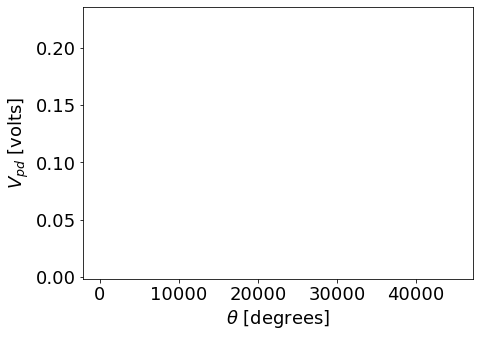

In [78]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt #this is the traditional method

mpl.rc('xtick', labelsize = 18)      #use 18 point font for numbering on x axis
mpl.rc('ytick', labelsize = 18)      #use 18 point font for numbering on y axis

plt.figure(figsize = (7,5))          #specify figure size as 7 x 5 inches
#for default size, type plt.figure()

plt.xlabel(r"$\theta$ [degrees]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_{pd}$ [volts]", fontsize = 18)   #use 18 point font for label text

plt.errorbar(f_gen, amp_R,
             xerr=None, yerr=None,
             linestyle = 'none',
             color = 'blue',
             capsize = 3, capthick = 1)

plt.show()

In [79]:
def resistance_amp_model(f, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

In [80]:
# initial guess for polarization models
R_r = 997.8    #initial guess, in mV
R = 1174.2    #initial guess, in mV
L = 0.0472    #initial guess, in mV
C = 1.47*10**(-9)    #initial guess, in mV
V_0 = 0.5   #initial guess, in mV

# theta0 = -2.0 * np.pi / 180   #initial guess for offset angle of 2 degree, in radians

initial_guess = np.array([R_r , R, L, C, V_0])
# initial_error = np.array([delta_V0, delta_theta, delta_V1])
old_fit = np.copy(initial_guess)  # save a copy to compare new with old

# estimated_error = photodiode_error(theta, delta_V0, delta_theta, delta_V1,
#                                    V0, theta0)    #propagate uncertainty using initial values

In [85]:
# load curve_fit routine from scipy
from scipy.optimize import curve_fit # import method used here

# alternative method (as recommended in https://docs.scipy.org/doc/scipy/reference.api.html)
#from scipy import optimize
#fit, covariance = optimize.curve_fit(...)

#run curve_fit for polarization_model
fit, covariance = curve_fit(resistance_amp_model, f_gen, amp_R,
                            p0 = initial_guess)
                            # sigma = estimated_error, absolute_sigma = True)

error = np.sqrt(np.diag(covariance))

print(old_fit)
print(fit)

old_fit = np.copy(fit)

print()
print('R_r    = ','{:.3f}'.format(fit[0]), '±', '{:.3f}'.format(error[0]), ' $\Omega$')
print('R    = ','{:.3f}'.format(fit[1]), '±', '{:.3f}'.format(error[1]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit[2]), '±', '{:.3f}'.format(error[2]), ' Henry')
print('C    = ','{:.12f}'.format(fit[3]), '±', '{:.12f}'.format(error[3]), ' F')
print('V_0    = ','{:.3f}'.format(fit[4]), '±', '{:.3f}'.format(error[4]), ' V')


[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]
[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]

R_r    =  1028.414 ± nan  $\Omega$
R    =  2326.792 ± nan  $\Omega$
L    =  0.04980 ± nan  Henry
C    =  0.000000001353 ± nan  F
V_0    =  0.514 ± nan  V


/var/folders/wx/z_3n9gy53dzd_bsxjtdg_t4h0000gn/T/ipykernel_4953/3188149061.py:13: RuntimeWarning: invalid value encountered in sqrt
  error = np.sqrt(np.diag(covariance))


In [82]:
new_initial_values = np.array([fit[0], fit[1], fit[2],fit[3],fit[4]])

# estimated_error = photodiode_error(theta, delta_V0, delta_theta, delta_V1,
#                                    fit[0], fit[1]) # propagate error using new values for V0, etc

fit, covariance = curve_fit(resistance_amp_model, f_gen, amp_R,
                            p0 = initial_guess)
# sigma = estimated_error, absolute_sigma = True)

# error = np.sqrt(np.diag(covariance))

print(old_fit)
print(fit)

old_fit = np.copy(fit)

Resistance_model = resistance_amp_model(f_gen, fit[0], fit[1], fit[2],fit[3],fit[4])
# residual = V_pd - V_pd_model

# data_uncertainty = photodiode_error(theta, delta_V0, delta_theta, delta_V1, fit[0], fit[1])
#
# chisq = sum((residual/ data_uncertainty)**2) #typo corrected
# degrees_of_freedom = len(residual) - len(initial_guess)
# reduced_chisq = chisq / degrees_of_freedom  # this should be close to one
# CDF = chi2.cdf(chisq, degrees_of_freedom)   # this should be close to 50 percent
#
# print('chi-square         = ',chisq)
# print('degrees of freedom = ',degrees_of_freedom)
# print('reduced chi-square = ',reduced_chisq)
# print('fractional probability of chisq ≤', chisq, 'for ', degrees_of_freedom, 'dof is', CDF)

[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]
[1.02841368e+03 2.32679165e+03 4.98005586e-02 1.35262930e-09
 5.13869591e-01]
